### 1. Setup and Import

In [2]:
import torch
import hydra
from pathlib import Path
from omegaconf import OmegaConf
from src.data.datamodule import get_dataloader
from src.utils.visualizer import Visualizer
from src.utils.device import get_device

# Mocking Hydra config per il notebook
root = Path("../")
cfg = OmegaConf.create({
    "dataset": {
        "data_dir": str(root / "data"),
        "batch_size": 8,
        "num_workers": 0,
        "pin_memory": False,
        "name": "cifar10"
    }
})

device = get_device()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
viz = Visualizer(classes)

### 2. Data Inspection (Ground Truth)

Files already downloaded and verified
Batch shape: torch.Size([8, 3, 32, 32])


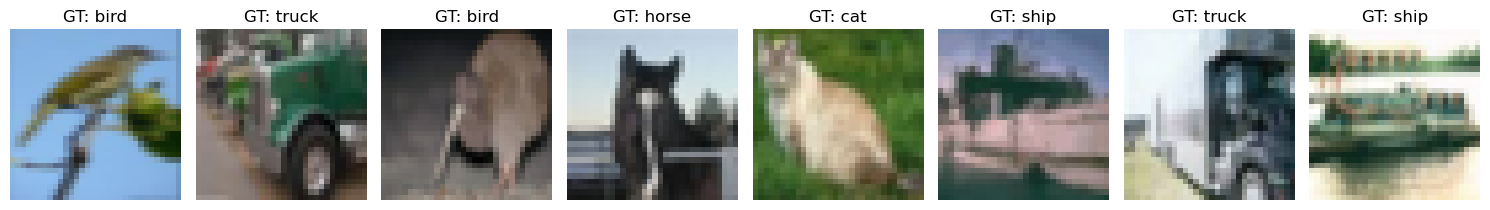

In [3]:
loader = get_dataloader(cfg, train=True)
images, labels = next(iter(loader))

print(f"Batch shape: {images.shape}")
fig = viz.plot_predictions(images, labels)

### 3. Model loading and Inference

Visualizing MLP Results:
Visualizing CNN Results:


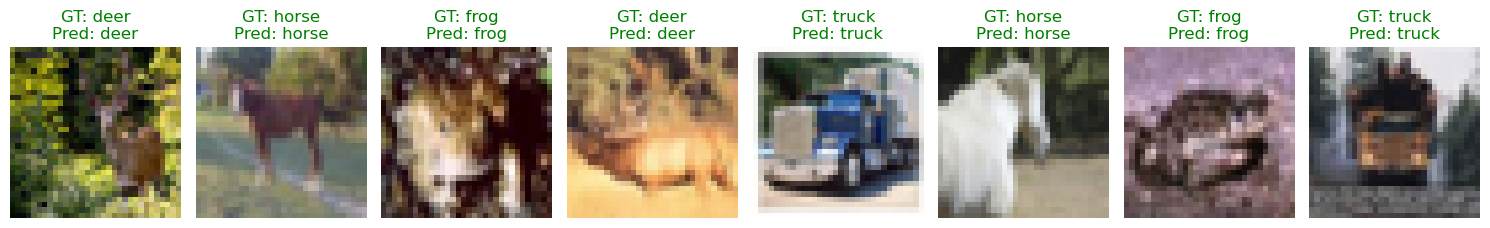

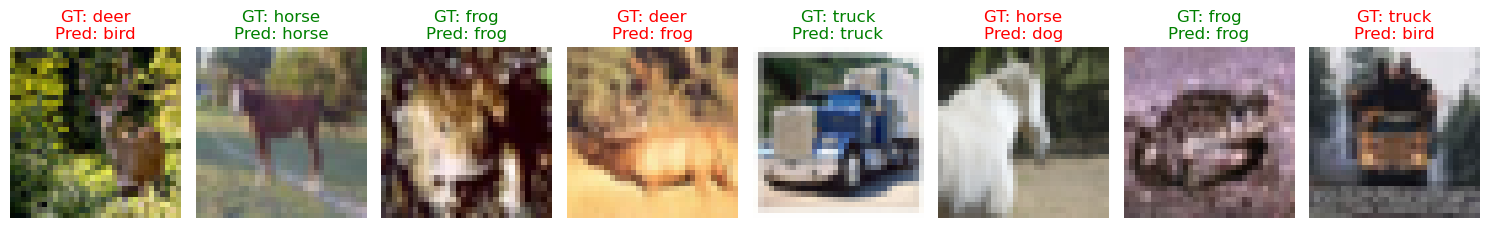

In [9]:
import torch.nn as nn
from src.models.pixel_mlp import PixelMLP
from src.models.spatial_cnn import SpatialCNN

mlp_model: nn.Module = PixelMLP(input_dim=3072, hidden_layers=[1024, 512, 256], num_classes=10, dropout_rate=0.2)
mlp_model_checkpoint = torch.load("../checkpoints/PixelMLP/last_checkpoint.pt")
mlp_model.load_state_dict(mlp_model_checkpoint['model_state_dict'])

cnn_model: nn.Module = SpatialCNN([3, 32, 64, 128], 256, 10)
cnn_model_checkpoint = torch.load("../checkpoints/SpatialCNN/last_checkpoint.pt")
cnn_model.load_state_dict(cnn_model_checkpoint['model_state_dict'])

mlp_model.to(device)
mlp_model.eval()

cnn_model.to(device)
cnn_model.eval()

with torch.no_grad():
    images, labels = next(iter(loader))
    images = images.to(device)
    mlp_preds = mlp_model(images).argmax(dim=1)
    cnn_preds = cnn_model(images).argmax(dim=1)

    print("Visualizing MLP Results:")
    fig_mlp = viz.plot_predictions(images.cpu(), labels, mlp_preds.cpu())
    print("Visualizing CNN Results:")
    fig_cnn = viz.plot_predictions(images.cpu(), labels, cnn_preds.cpu())

### Train vs Validation plot curves

In [10]:
# Assuming entity is your WandB username and project is 'latent-bridge'
entity = "ego_hoi" 
project = "latent-bridge"

fig_curves = viz.plot_learning_curves(entity, project)

AttributeError: 'Visualizer' object has no attribute 'plot_learning_curves'